# Lab 3: Raman Spectroscopy #

Raman spectroscopy is a powerful tool for identifiying the vibrational and rotational energies within a material. In this lab, you will learn to work with a laser, optics, and a spectrometer. You will measure the Raman spectra of various materials in order to identify them and learn about their molecular structure.
In Week 1 of this experiment you will make some absorption measurements that characterize
the two optical filters. You will then set up your optical train, calibrate your spectrograph and take the
Raman spectrum of three known plastics and an unknown.


## Import libraries and define functions for lab ##
Run the cell below to import the necessary libraries and to define custom functions for the Raman lab. 

In [1]:
# Libraries and definitions for Raman lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
nm = 1e-9
cm = 1e-2
c = 299792458 # Speed of light in m/s

def import_image(name):
    """ Import an image and sum over rows. Image must be in same folder as Jupyter notebook. 
    Output:
        x_pixels = numpy list of pixels for the x-axis [0,1,2,...]
        img1d = sum over the rows of img to make a 1D numpy array
        img = the original image as a 2D numpy array"""
    # Import image to numpy array
    img = pd.read_csv(name, sep="\t", header=None)
    img = img.to_numpy() # convert to numpy array
    
    # Sum over rows to make 1D
    img1d = np.sum(img,0)
    x_pixels= np.arange(len(img1d))
    return x_pixels, img1d, img


def peak_finder(data, threshold):
    """ Finds the location of the peaks above a value 'threshold' in a 1D numpy array.
    Output:
        peaks = list indices of found peaks in data"""
    # Find peaks
    peaks, _ = find_peaks(data, height=threshold) # imported from scipy.signal
    
    # Plot spectrum and peaks
    plt.plot(data)
    plt.plot(peaks, data[peaks], "x") # plot cross at each peak
    plt.grid()
    
    # Plot a line at the threshold
    line = np.full_like(data, threshold) 
    plt.plot(line , "--", color="gray")
    
    # Label plot and print peak locations
    plt.xlabel("Pixels")
    plt.ylabel("Counts")
    plt.title("Peak finder")
    print("Peaks found at pixel locations: ", peaks)
    return peaks

def polynomial(x, a, b, c):
    """Polynomial model used for fitting neon peak locations"""
    return a + b*x + c*x**2

def calibrate_pixel_to_wavelength(pixel, peaks, wavelengths):
    """ Convert a list of pixels 'x_pixels' to wavelength 'x_wavelength'.
    Input:
        pixel = list of image pixels [0,1,2,3,...,512]
        peaks = list of the pixels of peaks in the neon image
        wavelengths (nm) = the wavelength of the corresponding peaks in 'peaks'
    Output:
        x_wavelength (nm) = the calibrated x-axis in wavelengths
    """
    # Plot the peak pixels and wavelengths  
    plt.plot(peaks, wavelengths,'.')
    plt.xlabel('Pixels')
    plt.ylabel('Wavelength (nm)')
    
    # Perform curve fit of a second order polynomial
    params, cov = curve_fit(polynomial, peaks, wavelengths, p0=[760,-1,0])
    print("Fitted parameters: ", params)
    plt.plot(peaks, polynomial(peaks, *params)) # * means to insert a list as multiple arguments of a function
    plt.show()
    
    # Use the model to convert pixels to wavelengths
    x_wavelength = polynomial(pixel, *params)
    
    return x_wavelength



## PART 1: TRANSMISSION PROPERTIES OF BANDPASS & NOTCH FILTERS ##

**Never touch the surface of any lens, mirror or filter. Be careful! They are expensive and difficult to clean.**

You are going to use two optical filters in this lab, a bandpass and a notch filter. In this part of the lab, you are going to use an absorption spectrometer to measure the transmission properties of both
filters in order to figure out which one is which.

Select filters F1 and F2 from the set of optical components and take them to the absorption UV-VIS spectrometers that you used in the previous lab. Set the spectrometer with the
following parameters (NOTE: some set-ups may have different parameters):


|Start | End | Increment| Integrate | Cycles | Dwell | Delay | Mono2|
|---|---|---|---|---|---|---|---|
|600 | 700| 1.0| 500| 1|1290 |0 |0| 


In the LabView folder, open the file "RamanFilters.vi". We will run trials for the light source (blank), the bandpass filter and the notch filter. The percent transmission of these filters will be calculated by:

**% Transmittance of filter = 100% • (filter / blank)**

Start a new code cell and import either the data (ideal if data is in csv format) and plot a figure or import an image of a plot of your data directly.
Hint: You can import images directly by copying and pasting them in a Markdown cell. This works especially well with Window’s Snip tool. Just take a snip, copy, open your markdown cell, and paste.

From these plots, decide which filter is the bandpass filter and which filter is the notch filter. The bandpass filter allows only a narrow region or “band” of wavelengths to pass. The notch filter acts in a manner opposite to the bandpass filter in which it allows all wavelengths to pass except a narrow region or “notch”. In the below cell, record the approximate wavelengths of the pass and notch bands. Use the wavelength value at which 50% of the light is allowed to pass through the filter to define where the regions start or stop. Return these filters to the optical rack.
In your experiment, you will be using the passband in front of the laser to block any wavelengths from the laser outside the passband, since those would appear in our Raman spectrum. You will send the scattered light through the notch filter to get rid of the laser light and Rayleigh scattering, which also
is at the laser wavelength.

## PART 2. ALIGNMENT OF THE OPTICS AND SPECTROMETER 
In this section, you will align the optics so that the Raman scattered light is focused into the slit of the spectrometer. This is challenging so take your time! Here is a schematic of the experiment you will build and description of each part.

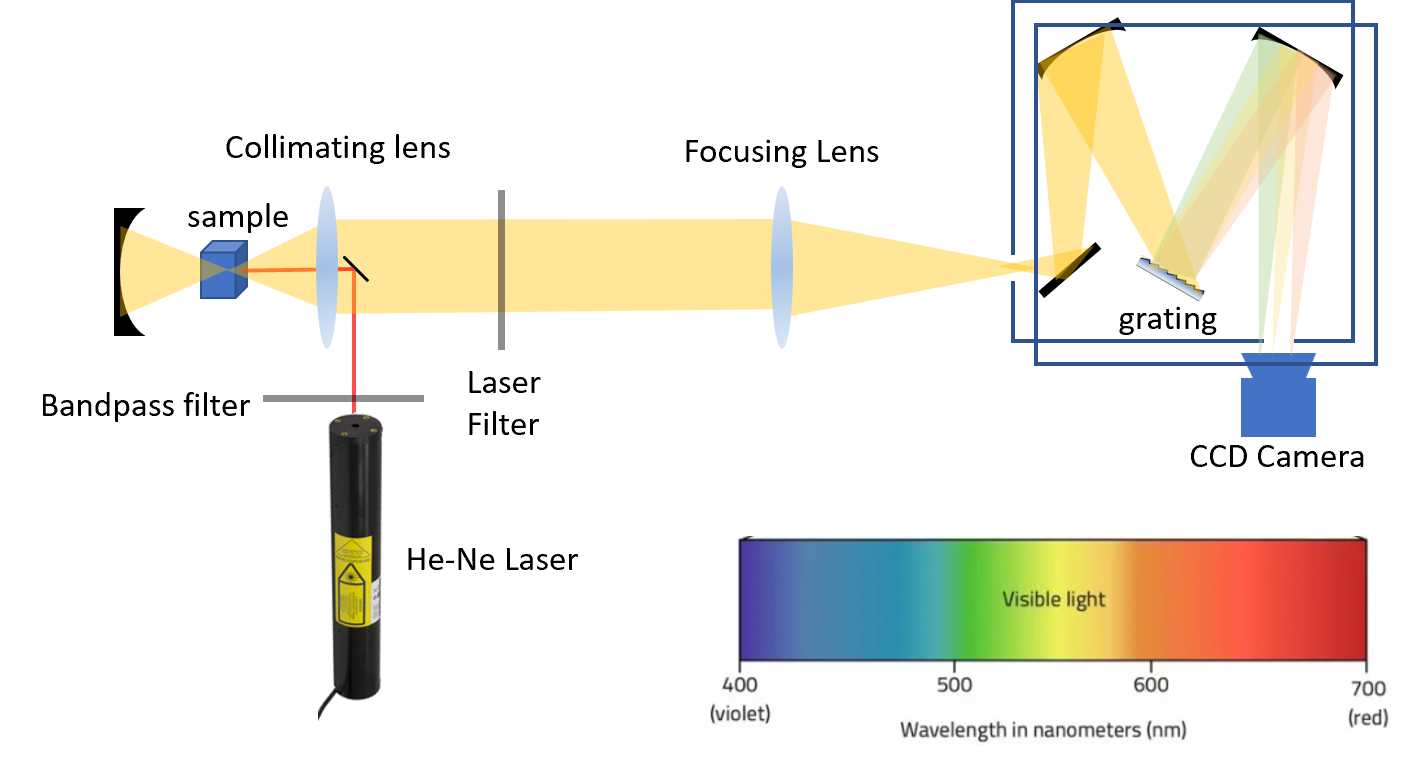

- He-Ne laser: The He-Ne laser emits light with a wavelength of 632.8 nm, or a wavenumber of 1580 cm-1
- BPF:  The bandpass filter only allows 632.8 nm through. Laser can have wavelengths far from their center wavelength, and this filters that light out.
- Prism and sample: The prism glued to the collimating lens reflects the laser light towards the sample, which will be placed on the wood block.
- Collimating lens: The scattered light in yellow from the sample is collected by the collimating lens. After the lens, the scattered light is collimated, meaning that the light is neither converging nor diverging.
- Notch filter: The notch filter filters out any of the laser light or Rayleigh scattering, so that only Raman scattered light remains, which has a different wavelength than the laser light.
- Focusing lens: The last lens has a focal length of 50 mm. It focuses the light down to a spot at the entrance slit of the spectrometer, which is 1 cm inside the spectrometer.
- The spectrometer uses a grating to separate different wavelengths and focus them down into an image onto a low noise CCD camera. The reflection angle from a diffraction grating is approximately $\theta \approx \lambda/d $, where $d$ is the spacing of the grooves on the grating.



Follow these instructions for aligning your spectrometer.

1) Close the shutter on the top-front of the HeNe laser. Place the filter that you have determined is the Band Pass Filter (BPF) into the post holder in front of the laser with the mirrored side towards the laser.

2) Open the shutter on the top-front side of the HeNe laser. Adjust the BPF so that the laser passes through the center of the filter and securely tighten down the locking screw on the post holder.

3) Place the collimating lens with the prism into post holder on the optical rail. Face the turning prism toward the spectrograph.

4) Adjust the position and height of the collimating lens until the laser beam spot is centered on the prism. You can accomplish this by placing the white card behind the prism and observing the shadow cast by the prism while checking to see that the laser pot is centered on the front of the prism. Tighten down the locking screw on the horizontal slider.

5) Slide the wooden block with the two white focusing cards back and forth along the optical axis on the left side of the collimating the lens (i.e. side away from spectrograph) until the reflected red focused spot appears on the spectrograph and is as small as possible.

6) Adjust the collimating lens until the laser spot on the spectrograph is centered both vertically and horizontally on the entrance slit on the monochromator. This is the most critical step.  Securely tighten down the locking screw on the post holder.

7) Using a ruler, roughly adjust the center of the post holder for the focusing lens until is around ?5 cm from the monochromator by sliding it along the optical rail. Tighten down the locking screw on the horizontal slider just enough to keep the post holder in place.

8) Slide the wood block (sample holder) with the white cards all the way to the right, up against the left side of the post holder for the collimating lens. This is required for focusing onto the spectrograph.

9) Roughly adjust the center of the post holder for the parabolic mirror (M1) to a distance equal to the focal length of M1 from the line on the sample block (again check to make sure the sample block is placed up against the post holder for L1). Place M1 into its designated post holder, and remove the white cards from the wooden block. Adjust the height of M1 until the laser spot is centered on the pinhole. Securely tighten down the locking screw of the post holder for M1 and tighten down the locking screw on the horizontal. NOTE: The alignment of M1 is not critical; a rough alignment to the pinhole center is all that is needed.

10) Center the post holder for the notch filter about two inches to the right of the collimating lens. Place the notch filter into the post holder making sure that the open side is towards the spectrograph and the filter is perpendicular to the optical rail. Place the white focusing card at the focal line and center the notch filter on the scattered laser light that may fall onto the edge of the filter. Securely tighten down the locking screw of the post holder for the notch filter.

11) Carefully place the plastic light shield so that the partially closed end is between F2 and L2. Gently slide the light shield back against the spectrograph. Make sure not to disturb any of the aligned optics.


## PART 3. CALIBRATION OF THE SPECTROMETER 
The spectrometer will focus different wavelengths to different pixels on the CCD camera. We
will need to use a calibration source in order to figure out which pixel corresponds to which wavelength or wavenumber. We will use a neon lamp as the calibration source because it emits visible photons at discrete wavelengths when excited in the region of wavelengths that we will be measuring. By using a neon calibration graph, you will match the wavelengths for specific neon peaks with their corresponding pixels from the CCD camera.
Before we are able to calibrate our window, we must first acquire a neon spectrum. DO NOT adjust the micrometer setting on the spectrograph at any time or you will have to recalibrate the spectrograph and retake all of your data!

1) In the “CCDOps” program, check to see that the camera temperature is -4.0 degrees Celsius by looking in the Status window. Click on the “Grab” icon, and set the exposure time to 0.30 seconds. DO NOT hit return yet or you will acquire a spectrum. Turn the neon lamp ON and place it between the notch filter and the plastic lens cover. Try to center the neon lamp on the optical axis while holding it stable. Click the “OK” button to acquire a spectrum. Once the spectrum is taken, save the file with FILE  Save As… as an ASCII file called “neon.txt” into the folder where your Jupyter notebook is saved.

2) Open the Jupyter notebook called “raman.ipnyb” on your desktop or download it from Brightspace. Copy the first cell into your notebook and run it. This cell imports libraries that you have used before (numpy, matplotlib, pands, and scipy), and defines functions for importing and calibrating data in this lab. Do not change these functions.

3) Start a new cell. We are now going to use a function defined in the cell you copied called import_image(“filename.txt”), which imports the image, and sums of the rows to make a 1D list of counts. It outputs three variables x_pixels, y_img1d, img. Look at the red text where the function is defined to see a description of these variables.

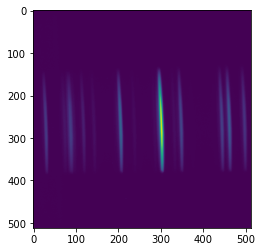

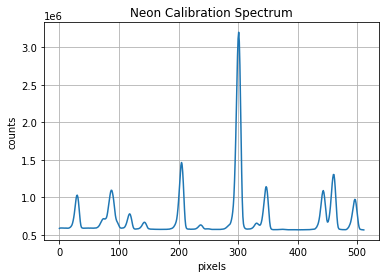

In [63]:
# Import the data and plot vs pixels
x_pixels, y_img1d, img = import_image("neon.TXT")

# Plot original image
plt.imshow(img)
plt.show()

# Plot image summed over rows
plt.plot(x_pixels, y_img1d) # sum over rows
plt.title('Neon Calibration Spectrum')
plt.xlabel('pixels')
plt.ylabel('counts')
plt.grid()
plt.show()



Start a new cell. You should several peaks in the 1D plot of the image. We are now going to use a function called ‘peak_finder(y_img1d, threshold)’ to output the pixel locations of those peaks. You must enter a threshold value to find peaks that go above that threshold. The function outputs a spectrum plot with a horizontal line drawn at the threshold value. Note that you should change the value of ‘threshold’ to obtain about 6 peaks (you will need at least 4, but the more the better). The value below of 1e6 will probably not work for you.
The function will print the list of found peaks and mark them in a plot.

Peaks found at pixel locations:  [ 30  87 205 301 347 443 460]


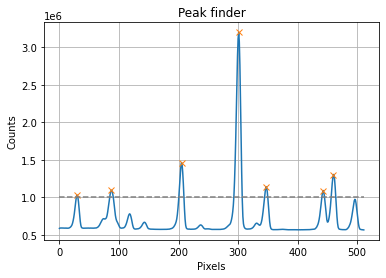

In [64]:
# Find the peaks
peaks = peak_finder(y_img1d, threshold=1e6)

5) Start a new cell. Now you have a list of pixels corresonding to the peaks in the neon spectrum. Look at the neon spectrums below to identify the wavelength in nm of each peak.
Make a numpy list of those peaks in nm, which will look something like
`wavelengths = np.array([763.51, 750.39, 724.52, 703.24, 692.95, 671.70, 667.83])`

Note that the length of ‘wavelengths’ should be the same length as ‘peaks’, because every wavelength should correspond to a peak pixel location. Make a quick plot of ‘peaks’ vs ‘wavelengths’ to make sure it is linear. We know it should be linear because the reflection angle from a grating is approximately $\theta = \lambda/d $, where $d$ is the spacing of the grooves on the grating.
Neon spectrum (the wavelength axis of the left and right panel are just flipped)

[ 30  87 205 301 347 443 460]
Fitted parameters:  [ 7.69996338e+02 -2.22213230e-01  5.54285960e-07]


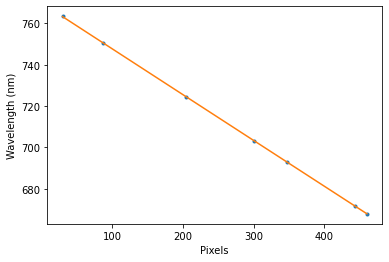

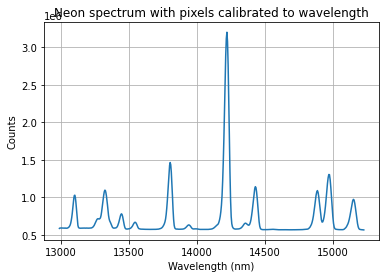

In [65]:
# Use peaks and corresponding wavelengths to convert pixels to wavelength
print(peaks)
wavelengths = np.array([763.51, 750.39, 724.52, 703.24, 692.95, 671.70, 667.83])

x_wavelengths = calibrate_pixel_to_wavelength(x_pixels, peaks, wavelengths)
plt.plot(x_wavelengths, y_img1d) # sum over rows
plt.xlabel('Wavelength (nm)')
plt.ylabel('Counts')
plt.title("Neon spectrum with pixels calibrated to wavelength")
plt.grid()
plt.show()

x_wavenumbers = 1/x_wavelengths*cm/nm # convert from wavelength (nm) to wavenumbers (cm^-1)


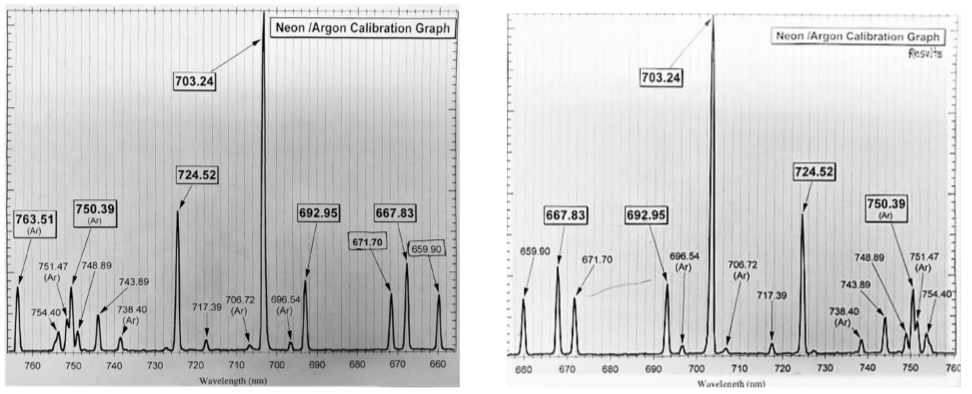

Now you have a list of pixel location of the peaks and a list of the corresponding wavelengths, which is approximately linear. We are now going to use a function called ‘calibrate_pixel_to_wavelength()’ that fits a polynomial model to this data, and then uses that model to convert all the pixels in ‘x_pixels’ to wavelenghts. See the red text in the
function definition for more information.


7) Convert variable ‘x_wavelengths’ to wavenumbers, and call it ‘x_wavenumbers’. A wavenumber has units cm^-1, and is defined as $\lambda$, where the wavelength $\lambda$ is in units cm. 1 Right now `x_wavelengths` is in units nm. Note that I have already defined `nm=1e-9` and `cm=1e-2` for you in the imported cell. Now plot the neon callibration data `y_img1d` vs `x_wavenumbers` and label your axes and give it a title.
8) Create a new variable ‘x_shifted’ which subtracts the laser frequency to get difference frequency from the laser frequency. As long as you don’t change the alignment of the spectrometer, you can now use this variable `x_shifted` for all of your data.


In [ ]:
x_shifted = 15803 - x_wavenumbers

## PART 4. RAMAN MEASUREMENT OF PLASTICS
The identification of plastics is important in recycling programs because different plastics
cannot be mixed together for processing. Raman spectroscopy is ideally suited for the task of identifying plastics because each plastic presents a unique vibrational fingerprint that allows it to be easily characterized. You will acquire the spectrum of three known plastics, polymethylmethacrylate (PMMA), polycarbonate (PC), and Polyethylene Terephthalate (PETE). Then you will acquire the spectrum of an unknown plastic, and by comparing the unknown spectrum to the spectra of the known plastics, you will determine the type of plastic that the unknown is made of.
Now that we have calibrated the pixels to wavelengths, we can begin collection of Raman spectra
from our plastics. Initially we will have to acquire a background blank so that fixed pattern noise or any light leaks into our system can be removed from our Raman spectrum. Once this background blank has been collected and loaded, we will then subtract the background blank off all the Raman spectra that we acquire.
ACQUISITION OF BACKGROUND BLANK

1) Begin by making sure the shutter on the laser is open, and the black cardboard box is over the sample holder. Click on the CCDOps program, click the “Grab” icon and set the exposure time to 60 seconds; click the “OK” button to acquire a background blank. Save this background spectrum with FILE  Save As… as an ASCII file called “background.txt” in the same folder as your Jupyter notebook.

2) Start a new cell. Import the background image and name the 1D image array ‘y_background.’ You will later subtract this from your Raman spectrum. background spectrum and label the axis and title.


### ACQUISITION OF PLASTIC SPECTRA 
1) Open the shutter on the laser and place the PMMA sample at the focal line on the sample block. If the sample will not stand on its own, use a brace to support it. Use the dock to bring the CCDOps program to the front. Click on the “Grab” icon and set the exposure time to 60 seconds; click “OK” to acquire the plastic’s Raman spectrum. Save this PMMA spectrum with FILE  Save As… as an ASCII (.txt) file “PMMA.txt” in the folder with your Jupyter notebook.
HINT: You should see faint verticle lines, however it is likely that you will not see anything on your first try. Raman scattered light is millions of times less bright than the laser. Make sure the wood is up against L1. Take the notch filter and try to get as much of the red light into the spectrometer slit as possible.

2) Repeat the procedure for the remaining plastics and the unknown in the following order, naming them PC, PETE, and Unknown.

3) Start a new cell and import the four spectra, calling the 1d image array ‘y_PMMA’, ‘y_PC’, ‘y_PETE’, and ‘y_Unknown.’ Subtract the background from each of these variables, and plot all the background subtracted spectra on the same plot. In the example below, only the PMMA and PC data are plotted, but you will need to include all 4 sets of data.

In [2]:

_, y_background, _  = import_image("background.txt")  # import_image outputs 3 variables, and we use _ to ignore 2 of them 
plt.plot(x_shifted, y_background)
plt.show()

_, y_PMMA, _ = import_image("PMMA.txt")
y_PMMA = y_PMMA - y_background # subtrack the background
plt.plot(x_shifted, y_PMMA)
plt.grid()
plt.xlabel("Wavenumber (cm^-1)")
plt.ylabel("Counts")
plt.title("PMMA")
plt.show()

_, y_PC, _ = import_image("PC.txt")
y_PC = y_PC - y_background # subtrack the background
plt.plot(x_shifted, y_PC, label= "PC")

plt.legend(loc="upper left") # loc determines where to put the legend
plt.grid()
plt.xlabel("Wavenumber (cm^-1)")
plt.ylabel("Counts")
plt.title("Raman spectra")
plt.show()

FileNotFoundError: [Errno 2] File b'background.txt' does not exist: b'background.txt'

4) You should be able to visually compare the spectra for the three known plastics to that of the unknown and assign the unknown plastic to one of the known types. Start a text cell and discuss which plastic you think the unknown is.
THIS IS THE END OF WEEK 1. UPLOAD YOUR NOTEBOOK TO BRIGHTSPACE AS A PDF. SAVE A
COPY OF YOUR FILES AND IMAGES SO THAT YOU CAN USE THEM NEXT WEEK.